In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

## chronopotentiometry For CNF Paper.xlsx visualization

In [3]:
# Load the Excel file
file_path = 'chronopotentiometry For CNF Paper.xlsx'
xls = pd.ExcelFile(file_path)


### first_sheet (85C)

In [4]:
# Load the first sheet into a DataFrame
first_sheet_df = xls.parse(xls.sheet_names[0], header=1)

# Display the first few rows of the DataFrame
print(first_sheet_df.head(2))
first_sheet_df.columns

   time/s     Ewe/V  time/hours  time/cycles    Ewe/mV  Unnamed: 5  time/s.1  \
0     0.0  0.066423    0.000000     0.000000   66.4233         NaN         0   
1    20.0  0.112931    0.005556     0.011111  112.9310         NaN        20   

    Ewe/V.1  Unnamed: 8  time/cycles.1  Ewe/V.2  Unnamed: 11  Unnamed: 12  \
0  0.007964         NaN       0.000000   7.9642          NaN          NaN   
1  0.011016         NaN       0.011111  11.0159          NaN          NaN   

   time/cycles.2  Ewe/mV.1  Ewe/mV.2  time/hours.1  time/cycles.3  Ewe/mV.3  \
0       0.000000   66.4233    7.9642      0.000000       0.000000  -9.14249   
1       0.011111  112.9310   11.0159      0.005556       0.011111  30.89700   

   Ewe/mV.4  
0  -4.62499  
1   0.19067  


Index(['time/s', 'Ewe/V', 'time/hours', 'time/cycles', 'Ewe/mV', 'Unnamed: 5',
       'time/s.1', 'Ewe/V.1', 'Unnamed: 8', 'time/cycles.1', 'Ewe/V.2',
       'Unnamed: 11', 'Unnamed: 12', 'time/cycles.2', 'Ewe/mV.1', 'Ewe/mV.2',
       'time/hours.1', 'time/cycles.3', 'Ewe/mV.3', 'Ewe/mV.4'],
      dtype='object')

In [5]:
first_sheet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21087 entries, 0 to 21086
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time/s         21084 non-null  float64
 1   Ewe/V          21084 non-null  float64
 2   time/hours     21084 non-null  float64
 3   time/cycles    21084 non-null  float64
 4   Ewe/mV         21084 non-null  float64
 5   Unnamed: 5     0 non-null      float64
 6   time/s.1       21087 non-null  int64  
 7   Ewe/V.1        21087 non-null  float64
 8   Unnamed: 8     0 non-null      float64
 9   time/cycles.1  21087 non-null  float64
 10  Ewe/V.2        21087 non-null  float64
 11  Unnamed: 11    0 non-null      float64
 12  Unnamed: 12    0 non-null      float64
 13  time/cycles.2  21084 non-null  float64
 14  Ewe/mV.1       21084 non-null  float64
 15  Ewe/mV.2       21084 non-null  float64
 16  time/hours.1   21084 non-null  float64
 17  time/cycles.3  20900 non-null  float64
 18  Ewe/mV

In [6]:

# Define the time columns
time_columns = ['time/hours', 'time/s', 'time/cycles', 'time/s.1', 'time/cycles.1', 'time/cycles.2', 'time/cycles.3']

# Function to calculate similarity percentage
def calculate_similarity(col1, col2, df=first_sheet_df):
    comparison = df[col1] == df[col2]
    matching_count = comparison.sum()
    total_count = comparison.count()
    proportion_identical = matching_count / total_count
    return proportion_identical

# Compare each pair of time columns and print the results
similarity_results = {}
for i in range(len(time_columns)):
    for j in range(i + 1, len(time_columns)):
        col1 = time_columns[i]
        col2 = time_columns[j]
        similarity = calculate_similarity(col1, col2)
        similarity_results[(col1, col2)] = similarity
        print(f"Similarity between {col1} and {col2}: {similarity:.2%}")

Similarity between time/hours and time/s: 0.00%
Similarity between time/hours and time/cycles: 0.00%
Similarity between time/hours and time/s.1: 0.00%
Similarity between time/hours and time/cycles.1: 0.00%
Similarity between time/hours and time/cycles.2: 0.00%
Similarity between time/hours and time/cycles.3: 0.00%
Similarity between time/s and time/cycles: 0.00%
Similarity between time/s and time/s.1: 60.92%
Similarity between time/s and time/cycles.1: 0.00%
Similarity between time/s and time/cycles.2: 0.00%
Similarity between time/s and time/cycles.3: 0.00%
Similarity between time/cycles and time/s.1: 0.00%
Similarity between time/cycles and time/cycles.1: 60.92%
Similarity between time/cycles and time/cycles.2: 99.99%
Similarity between time/cycles and time/cycles.3: 99.11%
Similarity between time/s.1 and time/cycles.1: 0.00%
Similarity between time/s.1 and time/cycles.2: 0.00%
Similarity between time/s.1 and time/cycles.3: 0.00%
Similarity between time/cycles.1 and time/cycles.2: 60

In [7]:

# Define the time columns
columns_to_plot = ['Ewe/V', 'Ewe/mV', 'Ewe/V.1', 'Ewe/V.2', 'Ewe/mV.1', 'Ewe/mV.2', 'Ewe/mV.3', 'Ewe/mV.4']

# Compare each pair of time columns and print the results
similarity_results = {}
for i in range(len(columns_to_plot)):
    for j in range(i + 1, len(columns_to_plot)):
        col1 = columns_to_plot[i]
        col2 = columns_to_plot[j]
        similarity = calculate_similarity(col1, col2)
        similarity_results[(col1, col2)] = similarity
        print(f"Similarity between {col1} and {col2}: {similarity:.2%}")

Similarity between Ewe/V and Ewe/mV: 0.00%
Similarity between Ewe/V and Ewe/V.1: 0.00%
Similarity between Ewe/V and Ewe/V.2: 0.00%
Similarity between Ewe/V and Ewe/mV.1: 0.00%
Similarity between Ewe/V and Ewe/mV.2: 0.00%
Similarity between Ewe/V and Ewe/mV.3: 0.00%
Similarity between Ewe/V and Ewe/mV.4: 0.00%
Similarity between Ewe/mV and Ewe/V.1: 0.00%
Similarity between Ewe/mV and Ewe/V.2: 0.00%
Similarity between Ewe/mV and Ewe/mV.1: 99.99%
Similarity between Ewe/mV and Ewe/mV.2: 0.00%
Similarity between Ewe/mV and Ewe/mV.3: 0.24%
Similarity between Ewe/mV and Ewe/mV.4: 0.00%
Similarity between Ewe/V.1 and Ewe/V.2: 0.00%
Similarity between Ewe/V.1 and Ewe/mV.1: 0.00%
Similarity between Ewe/V.1 and Ewe/mV.2: 0.00%
Similarity between Ewe/V.1 and Ewe/mV.3: 0.00%
Similarity between Ewe/V.1 and Ewe/mV.4: 0.00%
Similarity between Ewe/V.2 and Ewe/mV.1: 0.00%
Similarity between Ewe/V.2 and Ewe/mV.2: 99.99%
Similarity between Ewe/V.2 and Ewe/mV.3: 0.00%
Similarity between Ewe/V.2 and Ewe/mV.

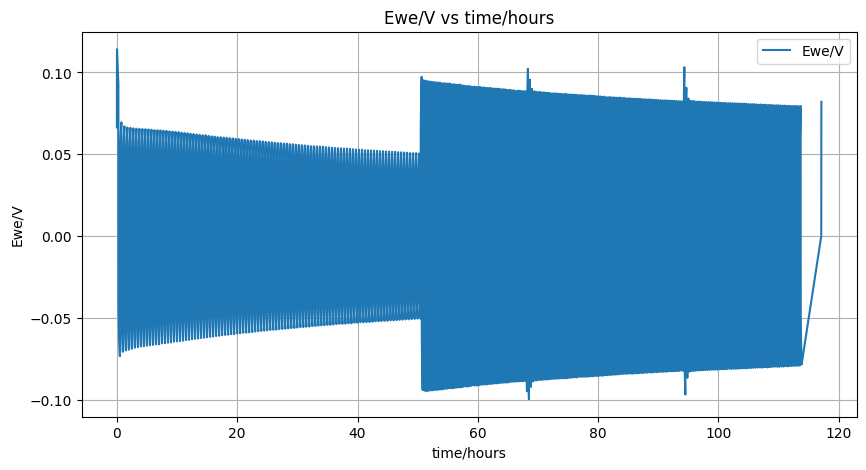

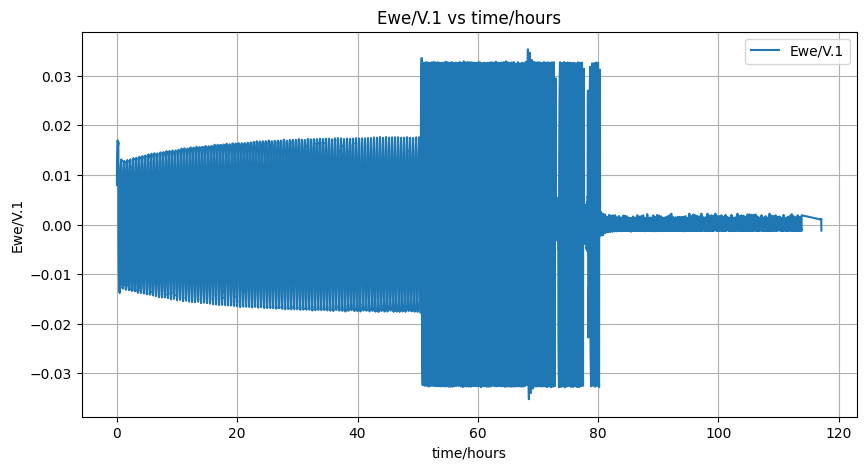

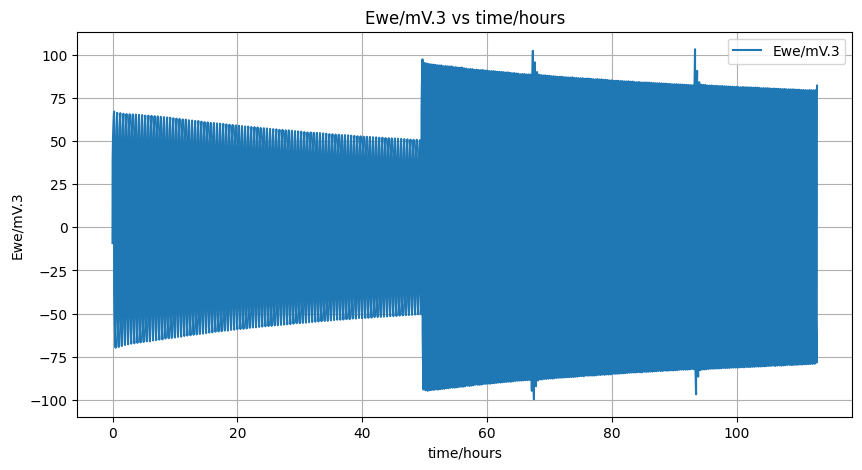

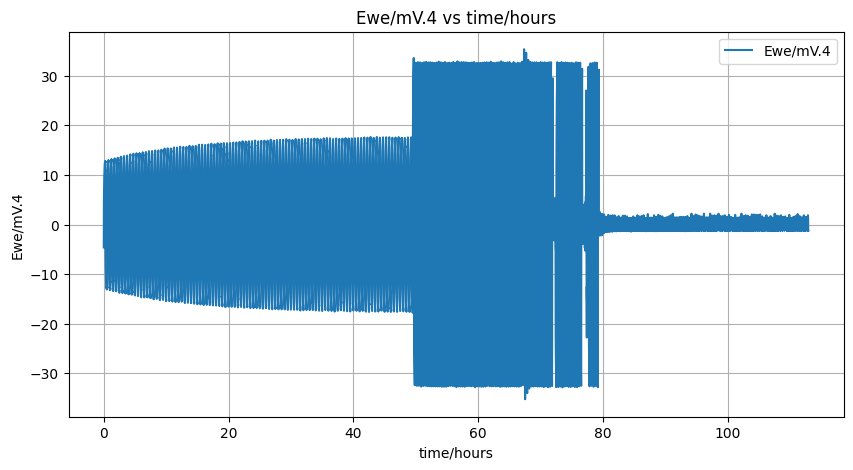

In [8]:
# Define time column and columns to plot
# time_column = ['time/hours', 'time/s', 'time/cycles']
time_column = ['time/hours']
columns_to_plot = ['Ewe/V', 'Ewe/V.1', 'Ewe/mV.3', 'Ewe/mV.4']

# Plot each relevant column against 'time/hours'
for col in columns_to_plot:
    for time_col in time_column:
        plt.figure(figsize=(10, 5))
        plt.plot(first_sheet_df[time_col], first_sheet_df[col], label=col)
        plt.xlabel(time_col)
        plt.ylabel(col)
        plt.title(f'{col} vs {time_col}')
        plt.legend()
        plt.grid(True)
        plt.show()

### second_sheet (65C)

In [9]:
# Load the first sheet into a DataFrame
second_sheet_df = xls.parse(xls.sheet_names[1])

# Display the first few rows of the DataFrame
print(second_sheet_df.head(2))

second_sheet_df.columns

   time/s     Ewe/V  Unnamed: 2  time/s.1   Ewe/V.1  Unnamed: 5  time/s.2  \
0       0  0.040701         NaN       0.0  0.008919         NaN       0.0   
1      20  0.102757         NaN      20.0  0.014303         NaN      20.0   

   Unnamed: 7  time/hours  time/cycles  PEO100/V    PEO4/V  PEO100 neat/V  
0         NaN    0.000000     0.000000  -47.7226 -8.655900        20.7193  
1         NaN    0.005556     0.011111   24.9895 -0.178459        43.5354  


Index(['time/s', 'Ewe/V', 'Unnamed: 2', 'time/s.1', 'Ewe/V.1', 'Unnamed: 5',
       'time/s.2', 'Unnamed: 7', 'time/hours', 'time/cycles', 'PEO100/V',
       'PEO4/V', 'PEO100 neat/V'],
      dtype='object')

In [10]:
second_sheet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31131 entries, 0 to 31130
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time/s         31131 non-null  int64  
 1   Ewe/V          31131 non-null  float64
 2   Unnamed: 2     0 non-null      float64
 3   time/s.1       25990 non-null  float64
 4   Ewe/V.1        25990 non-null  float64
 5   Unnamed: 5     0 non-null      float64
 6   time/s.2       25774 non-null  float64
 7   Unnamed: 7     0 non-null      float64
 8   time/hours     31131 non-null  float64
 9   time/cycles    31131 non-null  float64
 10  PEO100/V       31131 non-null  float64
 11  PEO4/V         31131 non-null  float64
 12  PEO100 neat/V  1840 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 3.1 MB


In [11]:
# Define the time columns
time_columns = ['time/s', 'time/s.1', 'time/s.2','time/hours', 'time/cycles']

# Compare each pair of time columns and print the results
similarity_results = {}
for i in range(len(time_columns)):
    for j in range(i + 1, len(time_columns)):
        col1 = time_columns[i]
        col2 = time_columns[j]
        similarity = calculate_similarity(col1, col2,second_sheet_df)
        similarity_results[(col1, col2)] = similarity
        print(f"Similarity between {col1} and {col2}: {similarity:.2%}")

Similarity between time/s and time/s.1: 71.48%
Similarity between time/s and time/s.2: 32.96%
Similarity between time/s and time/hours: 0.00%
Similarity between time/s and time/cycles: 0.00%
Similarity between time/s.1 and time/s.2: 32.96%
Similarity between time/s.1 and time/hours: 0.00%
Similarity between time/s.1 and time/cycles: 0.00%
Similarity between time/s.2 and time/hours: 0.00%
Similarity between time/s.2 and time/cycles: 0.00%
Similarity between time/hours and time/cycles: 0.00%


In [12]:
# Define the time columns
columns_to_plot = ['Ewe/V', 'Ewe/V.1','PEO100/V','PEO4/V', 'PEO100 neat/V']

# Compare each pair of time columns and print the results
similarity_results = {}
for i in range(len(columns_to_plot)):
    for j in range(i + 1, len(columns_to_plot)):
        col1 = columns_to_plot[i]
        col2 = columns_to_plot[j]
        similarity = calculate_similarity(col1, col2,second_sheet_df)
        similarity_results[(col1, col2)] = similarity
        print(f"Similarity between {col1} and {col2}: {similarity:.2%}")

Similarity between Ewe/V and Ewe/V.1: 0.00%
Similarity between Ewe/V and PEO100/V: 0.00%
Similarity between Ewe/V and PEO4/V: 0.00%
Similarity between Ewe/V and PEO100 neat/V: 0.00%
Similarity between Ewe/V.1 and PEO100/V: 0.00%
Similarity between Ewe/V.1 and PEO4/V: 0.00%
Similarity between Ewe/V.1 and PEO100 neat/V: 0.00%
Similarity between PEO100/V and PEO4/V: 0.00%
Similarity between PEO100/V and PEO100 neat/V: 0.00%
Similarity between PEO4/V and PEO100 neat/V: 0.00%


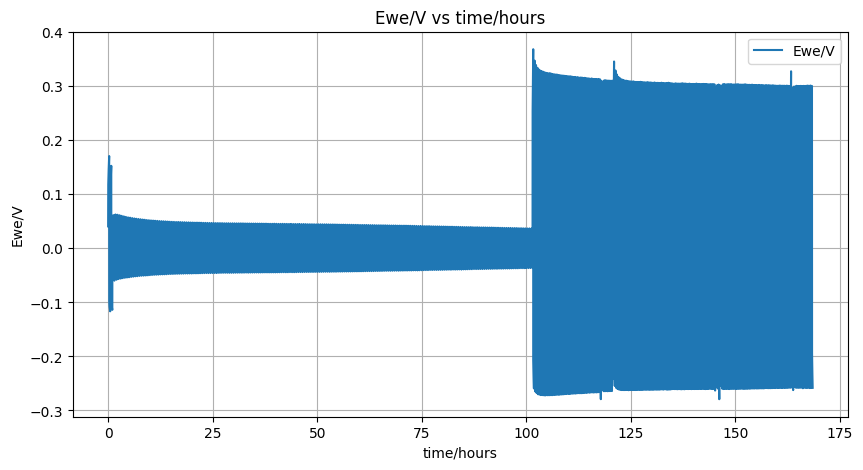

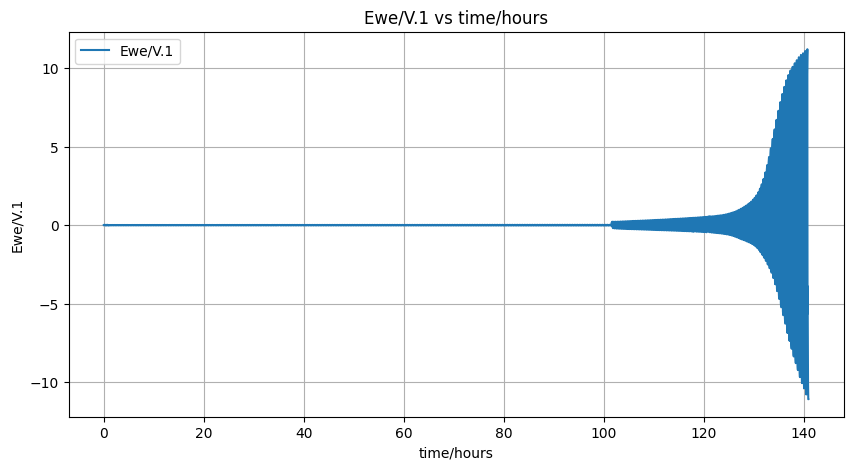

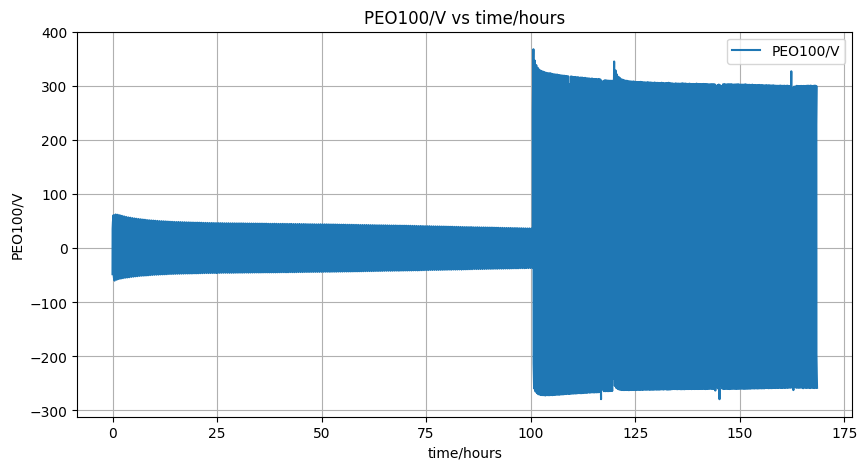

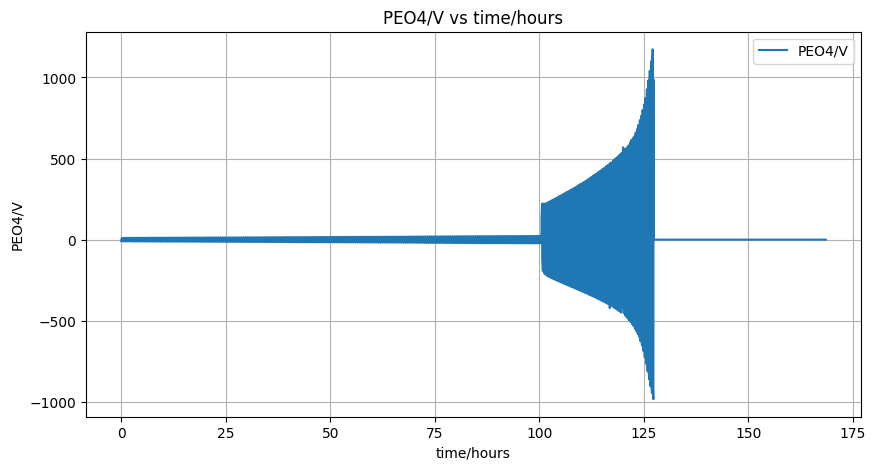

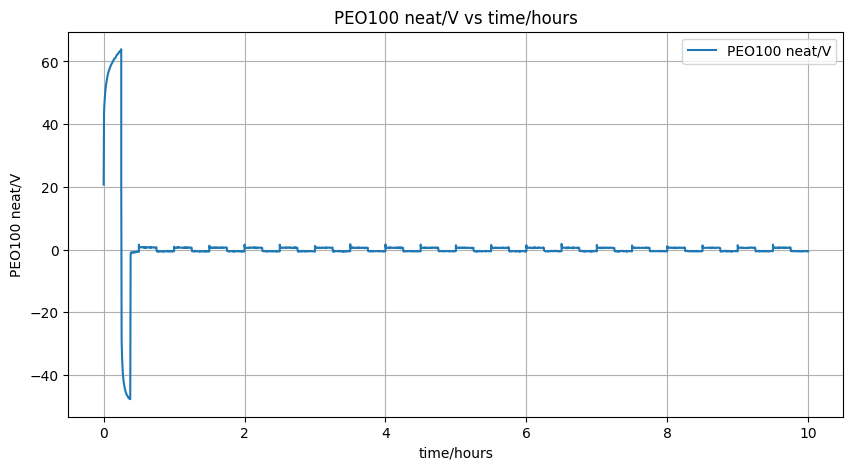

In [13]:
# Define time column and columns to plot
# time_column = ['time/s', 'time/s.2','time/hours', 'time/cycles']
time_column = ['time/hours']
columns_to_plot = ['Ewe/V', 'Ewe/V.1','PEO100/V','PEO4/V', 'PEO100 neat/V']

# Plot each relevant column against 'time/hours'
for col in columns_to_plot:
    for time_col in time_column:
        plt.figure(figsize=(10, 5))
        plt.plot(second_sheet_df[time_col], second_sheet_df[col], label=col)
        plt.xlabel(time_col)
        plt.ylabel(col)
        plt.title(f'{col} vs {time_col}')
        plt.legend()
        plt.grid(True)
        plt.show()

### Third_sheet (inset PEO)

In [14]:
# Load the first sheet into a DataFrame
third_sheet = xls.parse(xls.sheet_names[2])

# Display the first few rows of the DataFrame
print(third_sheet.head(2))

third_sheet.columns

   time/cycles    PEO100      PEO4  PEO100 neat  Unnamed: 4  Unnamed: 5  \
0     0.000000   40.7012   8.91892      20.7193         NaN         NaN   
1     0.011111  102.7570  14.30270      43.5354         NaN         NaN   

   time/cycles.1  PEO100.1    PEO4.1  PEO100 neat.1  
0       0.000000  -47.7226 -8.655900        20.7193  
1       0.011111   24.9895 -0.178459        43.5354  


Index(['time/cycles', 'PEO100', 'PEO4', 'PEO100 neat', 'Unnamed: 4',
       'Unnamed: 5', 'time/cycles.1', 'PEO100.1', 'PEO4.1', 'PEO100 neat.1'],
      dtype='object')

In [15]:
third_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time/cycles    1840 non-null   float64
 1   PEO100         1840 non-null   float64
 2   PEO4           1840 non-null   float64
 3   PEO100 neat    1840 non-null   float64
 4   Unnamed: 4     0 non-null      float64
 5   Unnamed: 5     0 non-null      float64
 6   time/cycles.1  1656 non-null   float64
 7   PEO100.1       1656 non-null   float64
 8   PEO4.1         1656 non-null   float64
 9   PEO100 neat.1  1656 non-null   float64
dtypes: float64(10)
memory usage: 143.9 KB


In [16]:
# Define the time columns
time_columns = ['time/cycles', 'time/cycles.1']

# Compare each pair of time columns and print the results
similarity_results = {}
for i in range(len(time_columns)):
    for j in range(i + 1, len(time_columns)):
        col1 = time_columns[i]
        col2 = time_columns[j]
        similarity = calculate_similarity(col1, col2,third_sheet)
        similarity_results[(col1, col2)] = similarity
        print(f"Similarity between {col1} and {col2}: {similarity:.2%}")

Similarity between time/cycles and time/cycles.1: 90.00%


In [17]:
# Define the time columns
columns_to_plot = ['PEO100', 'PEO4', 'PEO100 neat', 'PEO100.1', 'PEO4.1', 'PEO100 neat.1']

# Compare each pair of time columns and print the results
similarity_results = {}
for i in range(len(columns_to_plot)):
    for j in range(i + 1, len(columns_to_plot)):
        col1 = columns_to_plot[i]
        col2 = columns_to_plot[j]
        similarity = calculate_similarity(col1, col2,third_sheet)
        similarity_results[(col1, col2)] = similarity
        print(f"Similarity between {col1} and {col2}: {similarity:.2%}")

Similarity between PEO100 and PEO4: 0.00%
Similarity between PEO100 and PEO100 neat: 0.00%
Similarity between PEO100 and PEO100.1: 0.16%
Similarity between PEO100 and PEO4.1: 0.00%
Similarity between PEO100 and PEO100 neat.1: 0.00%
Similarity between PEO4 and PEO100 neat: 0.00%
Similarity between PEO4 and PEO100.1: 0.00%
Similarity between PEO4 and PEO4.1: 2.72%
Similarity between PEO4 and PEO100 neat.1: 0.00%
Similarity between PEO100 neat and PEO100.1: 0.00%
Similarity between PEO100 neat and PEO4.1: 0.00%
Similarity between PEO100 neat and PEO100 neat.1: 90.00%
Similarity between PEO100.1 and PEO4.1: 0.00%
Similarity between PEO100.1 and PEO100 neat.1: 0.00%
Similarity between PEO4.1 and PEO100 neat.1: 0.00%


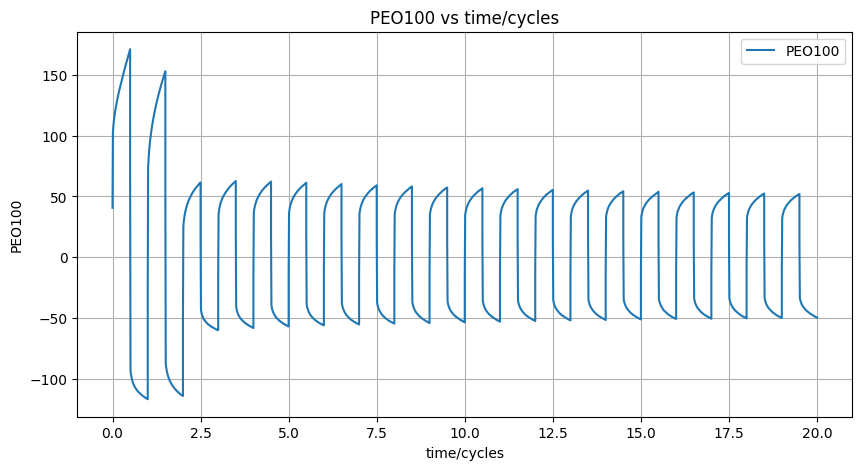

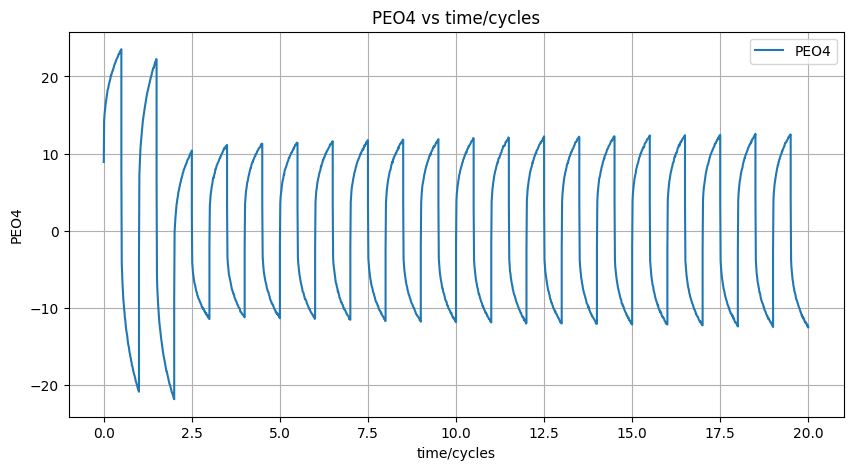

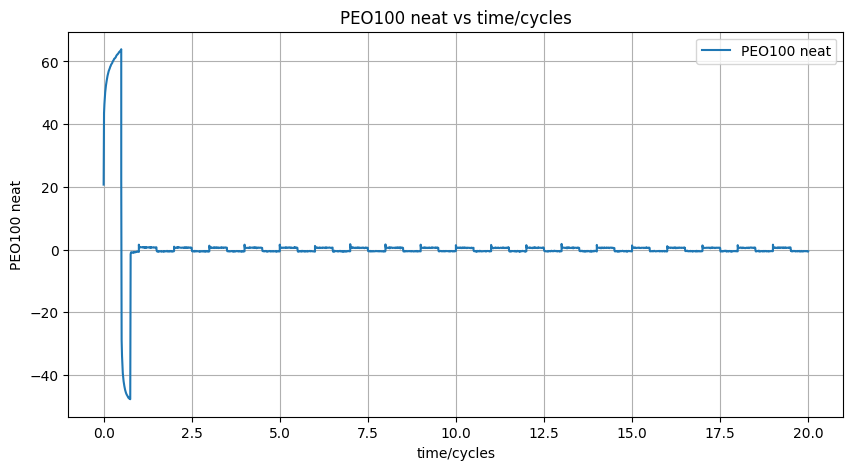

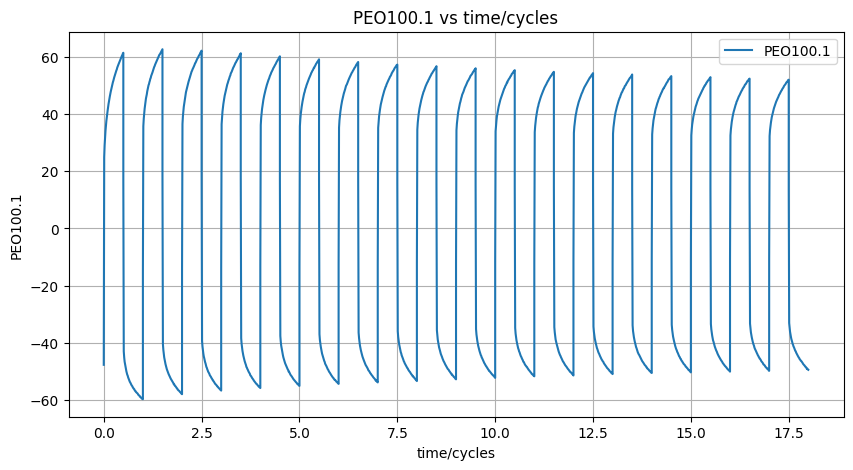

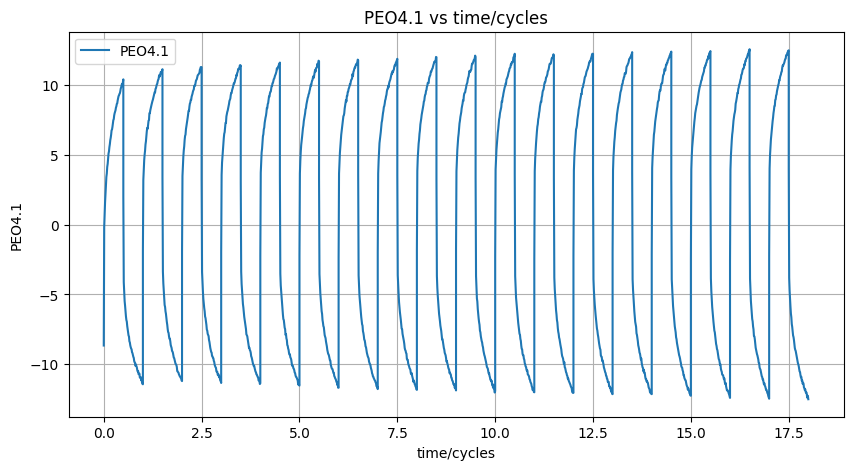

In [18]:
# Define time column and columns to plot
time_column = ['time/cycles']
columns_to_plot = ['PEO100', 'PEO4', 'PEO100 neat', 'PEO100.1', 'PEO4.1']

# Plot each relevant column against 'time/hours'
for col in columns_to_plot:
    for time_col in time_column:
        plt.figure(figsize=(10, 5))
        plt.plot(third_sheet[time_col], third_sheet[col], label=col)
        plt.xlabel(time_col)
        plt.ylabel(col)
        plt.title(f'{col} vs {time_col}')
        plt.legend()
        plt.grid(True)
        plt.show()

### Fourth Sheet (inset 85)

In [19]:
# Load the first sheet into a DataFrame
fourth_sheet = xls.parse(xls.sheet_names[3])

# Display the first few rows of the DataFrame
print(fourth_sheet.head(2))

fourth_sheet.columns

       cycles  Unnamed: 1  Unnamed: 2      hours    cycles.1   PEO100     PEO4
0  156.000000     4.09356    -3.37956  78.000000  156.000000  84.9877  32.5137
1  156.011111   -44.26070    -3.70413  78.005556  156.011111  85.6562  12.5348


Index(['cycles', 'Unnamed: 1', 'Unnamed: 2', 'hours', 'cycles.1', 'PEO100',
       'PEO4'],
      dtype='object')

In [20]:
fourth_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cycles      558 non-null    float64
 1   Unnamed: 1  558 non-null    float64
 2   Unnamed: 2  558 non-null    float64
 3   hours       558 non-null    float64
 4   cycles.1    558 non-null    float64
 5   PEO100      558 non-null    float64
 6   PEO4        558 non-null    float64
dtypes: float64(7)
memory usage: 30.6 KB


In [21]:
# Define the time columns
time_columns = ['cycles', 'Unnamed: 1', 'Unnamed: 2', 'hours', 'cycles.1']

# Compare each pair of time columns and print the results
similarity_results = {}
for i in range(len(time_columns)):
    for j in range(i + 1, len(time_columns)):
        col1 = time_columns[i]
        col2 = time_columns[j]
        similarity = calculate_similarity(col1, col2,fourth_sheet)
        similarity_results[(col1, col2)] = similarity
        print(f"Similarity between {col1} and {col2}: {similarity:.2%}")

Similarity between cycles and Unnamed: 1: 0.00%
Similarity between cycles and Unnamed: 2: 0.00%
Similarity between cycles and hours: 0.00%
Similarity between cycles and cycles.1: 100.00%
Similarity between Unnamed: 1 and Unnamed: 2: 0.00%
Similarity between Unnamed: 1 and hours: 0.00%
Similarity between Unnamed: 1 and cycles.1: 0.00%
Similarity between Unnamed: 2 and hours: 0.00%
Similarity between Unnamed: 2 and cycles.1: 0.00%
Similarity between hours and cycles.1: 0.00%


In [22]:
# Define the time columns
columns_to_plot = ['PEO100','PEO4']

# Compare each pair of time columns and print the results
similarity_results = {}
for i in range(len(columns_to_plot)):
    for j in range(i + 1, len(columns_to_plot)):
        col1 = columns_to_plot[i]
        col2 = columns_to_plot[j]
        similarity = calculate_similarity(col1, col2,fourth_sheet)
        similarity_results[(col1, col2)] = similarity
        print(f"Similarity between {col1} and {col2}: {similarity:.2%}")

Similarity between PEO100 and PEO4: 0.00%


- The unnamed column looks like a time interval of some sort. Just visualizing it to see the behaviour

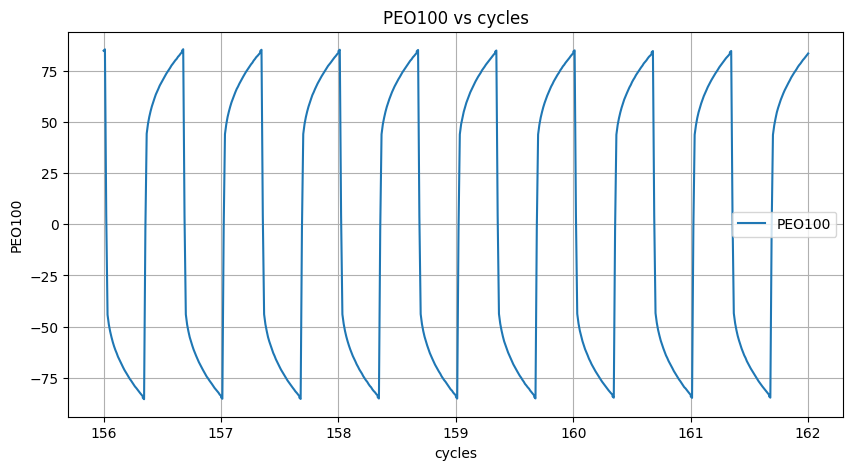

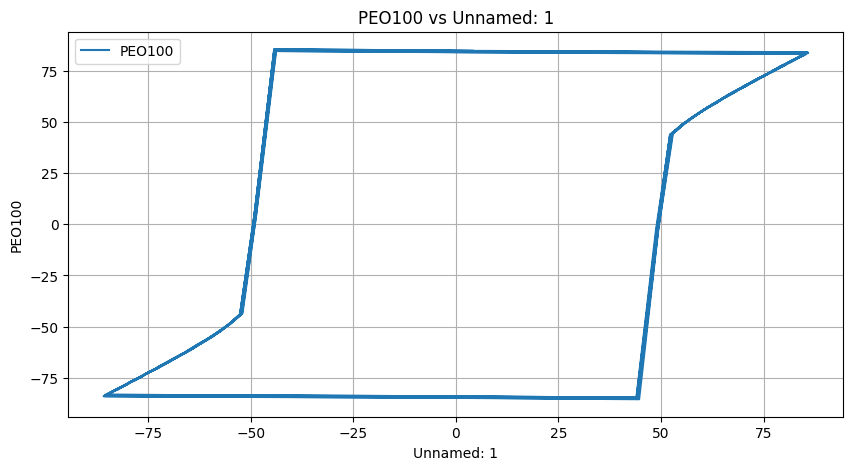

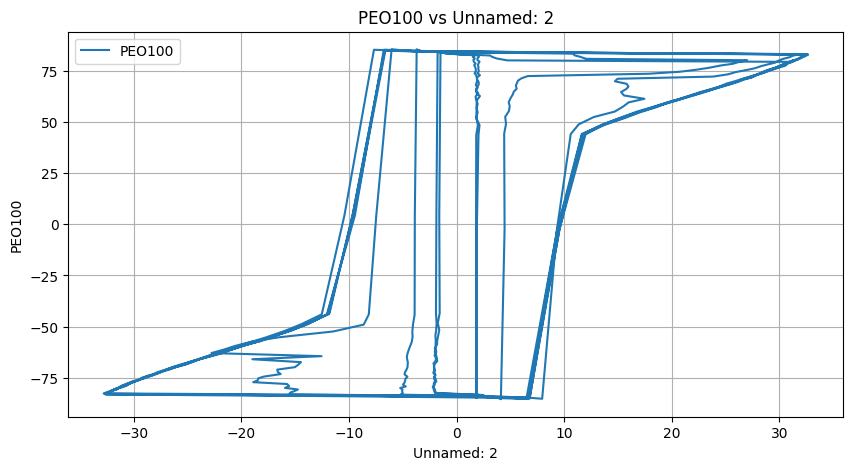

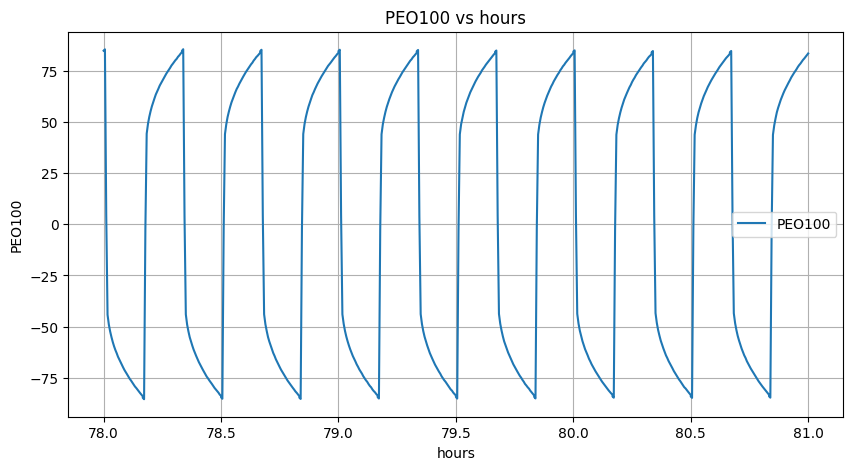

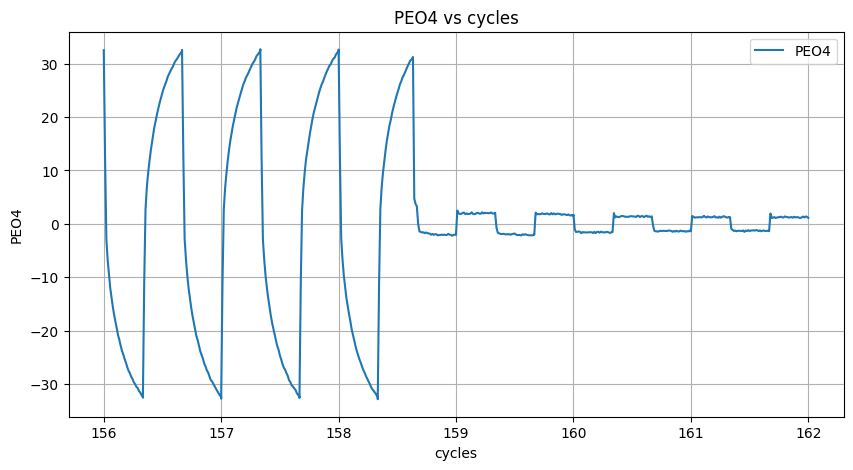

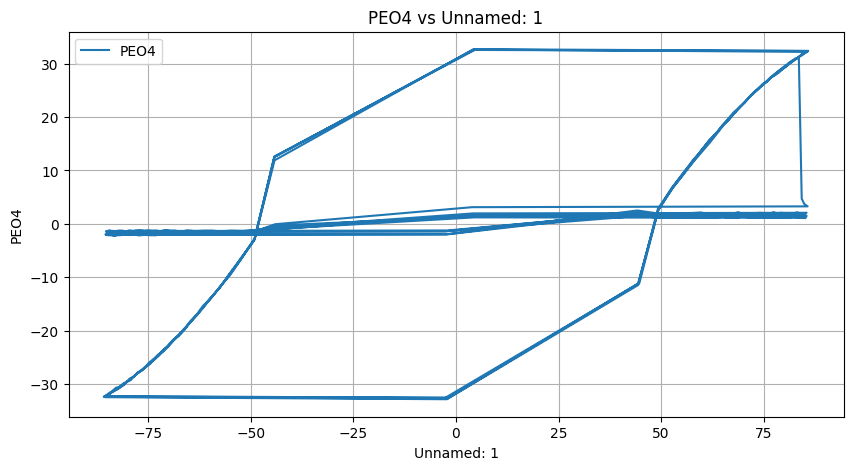

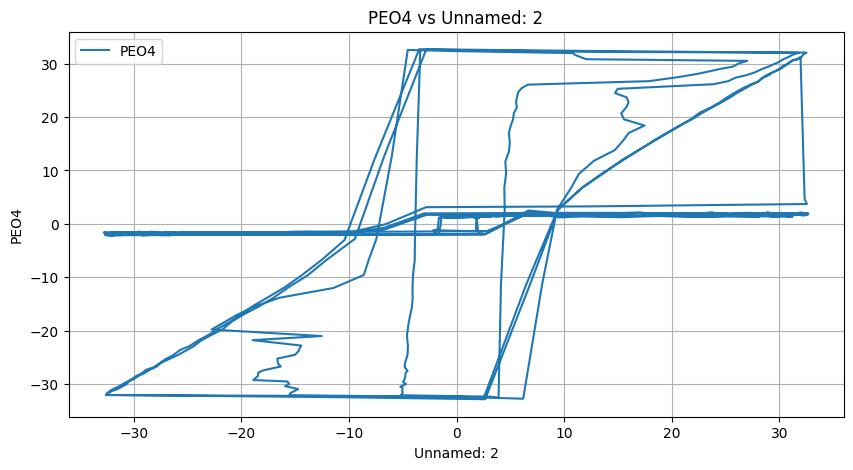

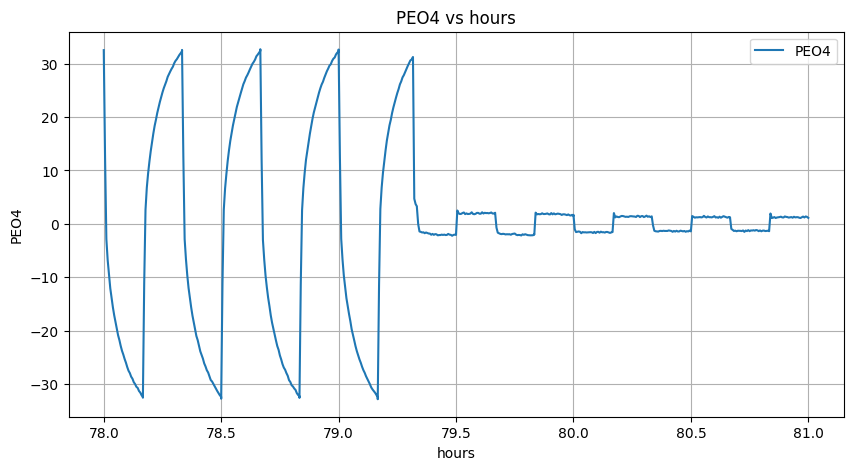

In [23]:
# Define time column and columns to plot
time_column = ['cycles', 'Unnamed: 1', 'Unnamed: 2', 'hours',]
columns_to_plot = ['PEO100','PEO4']

# Plot each relevant column against 'time/hours'
for col in columns_to_plot:
    for time_col in time_column:
        plt.figure(figsize=(10, 5))
        plt.plot(fourth_sheet[time_col], fourth_sheet[col], label=col)
        plt.xlabel(time_col)
        plt.ylabel(col)
        plt.title(f'{col} vs {time_col}')
        plt.legend()
        plt.grid(True)
        plt.show()

### Fifth Sheet (inset 65)

In [24]:
# Load the first sheet into a DataFrame
fifth_sheet = xls.parse(xls.sheet_names[4])

# Display the first few rows of the DataFrame
print(fifth_sheet.head(2))

fifth_sheet.columns

      time,h   Unnamed: 1   peo100     peo4
0  122.000000  244.000000  307.987  561.453
1  122.005556  244.011111  312.281  570.585


Index(['time,h ', 'Unnamed: 1', 'peo100', 'peo4'], dtype='object')

In [25]:
fifth_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time,h      1488 non-null   float64
 1   Unnamed: 1  1488 non-null   float64
 2   peo100      1488 non-null   float64
 3   peo4        1488 non-null   float64
dtypes: float64(4)
memory usage: 46.6 KB


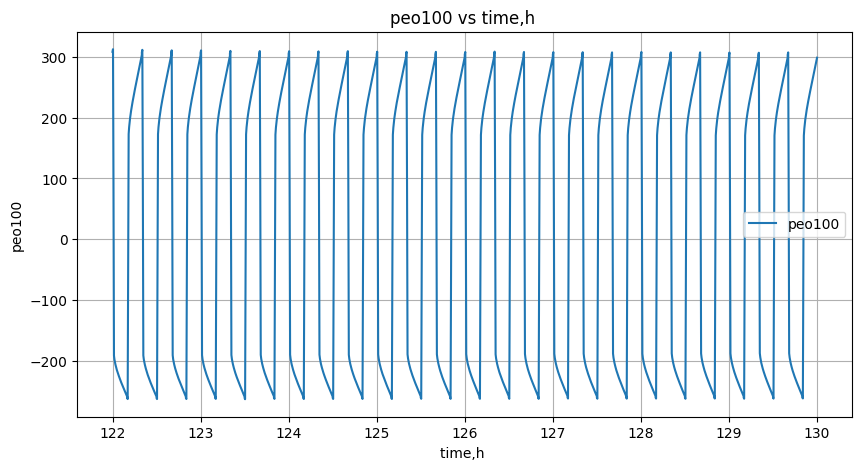

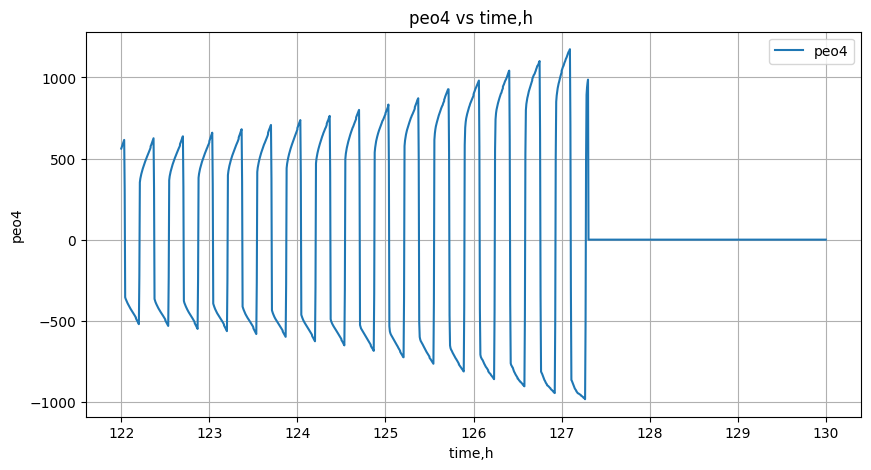

In [26]:
# Define time column and columns to plot
time_column = ['time,h ']
columns_to_plot = ['peo100', 'peo4']

# Plot each relevant column against 'time/hours'
for col in columns_to_plot:
    for time_col in time_column:
        plt.figure(figsize=(10, 5))
        plt.plot(fifth_sheet[time_col], fifth_sheet[col], label=col)
        plt.xlabel(time_col)
        plt.ylabel(col)
        plt.title(f'{col} vs {time_col}')
        plt.legend()
        plt.grid(True)
        plt.show()